In [1]:
import pandas as pd

# Load CSV files
train = pd.read_csv('../data/train.csv')
features = pd.read_csv('../data/features.csv')
stores = pd.read_csv('../data/stores.csv')

# Check the shape and preview
print(train.shape)
print(features.shape)
print(stores.shape)

train.head()


(421570, 5)
(8190, 12)
(45, 3)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [2]:
# Merge train with features on Store, Date, and IsHoliday
merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with store metadata
merged = pd.merge(merged, stores, on='Store', how='left')

# Convert 'Date' to datetime
merged['Date'] = pd.to_datetime(merged['Date'])

merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [3]:
# Check for missing values
print(merged.isnull().sum())

# Optionally: fill or drop missing values
merged.fillna(0, inplace=True)  # Simple way to handle NAs for now

# Check types
merged.info()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64      

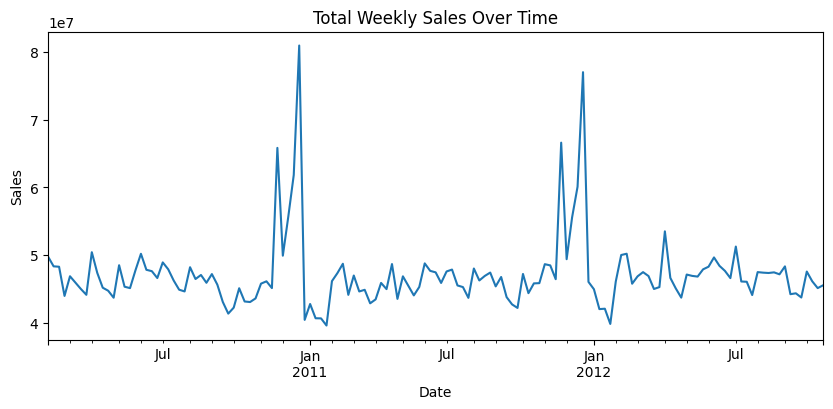

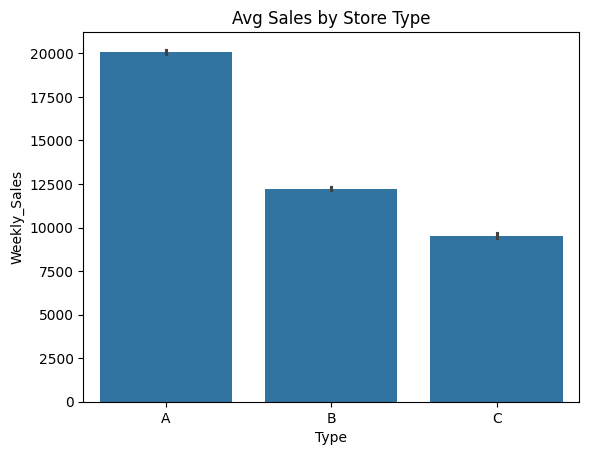

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total weekly sales over time
weekly_sales = merged.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.plot(figsize=(10,4), title='Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Average sales per store type
sns.barplot(data=merged, x='Type', y='Weekly_Sales')
plt.title('Avg Sales by Store Type')
plt.show()


In [6]:
# Merge train with stores
merged = train.merge(stores, how='left', on='Store')

# Merge with features
merged = merged.merge(features, how='left', on=['Store', 'Date'])


In [7]:
merged['Date'] = pd.to_datetime(merged['Date'])


In [8]:
merged = merged.dropna(subset=['Weekly_Sales'])  # or use fillna if needed


In [9]:
merged.to_csv('merged_cleaned_data.csv', index=False)
print("✅ merged_cleaned_data.csv saved successfully.")


✅ merged_cleaned_data.csv saved successfully.


In [10]:
df = pd.read_csv('merged_cleaned_data.csv')


In [11]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [17]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'year',
       'month', 'day', 'dayofweek', 'is_weekend'],
      dtype='object')


In [18]:
df = df.rename(columns={'Weekly_Sales': 'sales'})


In [19]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Rename column to match feature engineering steps
df = df.rename(columns={'Weekly_Sales': 'sales'})

# ✅ Sort
df = df.sort_values(by=['Store', 'Date'])

# ✅ Apply lag
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)


In [20]:
# Create lag and rolling features
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)

df['rolling_avg_7'] = df.groupby('Store')['sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())


In [21]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [22]:
# If not already done
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [23]:
# Drop rows with any missing values (lag/rolling will cause some)
df.dropna(inplace=True)

# Drop columns that aren’t useful for modeling
df.drop(['Date', 'IsHoliday'], axis=1, inplace=True, errors='ignore')


In [24]:
df.to_csv('train_ready.csv', index=False)
print("✅ Saved train_ready.csv — feature engineered and ready for modeling.")


✅ Saved train_ready.csv — feature engineered and ready for modeling.


In [25]:
import pandas as pd

df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Important!

In [26]:
model_data = pd.read_csv('train_ready.csv')


In [32]:
import pandas as pd

model_data = pd.read_csv('train_ready.csv')
print(model_data.head())


   Store  Dept     sales  IsHoliday_x    Size  Temperature  Fuel_Price  \
0      1     1  18689.54        False  151315        59.11       3.297   
1      1     2  44936.47        False  151315        59.11       3.297   
2      1     3   9959.64        False  151315        59.11       3.297   
3      1     4  36826.52        False  151315        59.11       3.297   
4      1     5  31002.65        False  151315        59.11       3.297   

   MarkDown1  MarkDown2  MarkDown3  ...     lag_1      lag_7  rolling_avg_7  \
0    10382.9    6115.67     215.07  ...  13026.08  152401.64   69638.215714   
1    10382.9    6115.67     215.07  ...  18689.54   77943.57   50536.487143   
2    10382.9    6115.67     215.07  ...  44936.47   59511.97   45821.187143   
3    10382.9    6115.67     215.07  ...   9959.64  114793.92   38742.282857   
4    10382.9    6115.67     215.07  ...  36826.52   33307.40   27604.082857   

   year  month  day  dayofweek  is_weekend  Type_B  Type_C  
0  2011     11   11

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [35]:
print(model_data.columns.tolist())


['Store', 'Dept', 'sales', 'IsHoliday_x', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'lag_1', 'lag_7', 'rolling_avg_7', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'Type_B', 'Type_C']


In [39]:
from sklearn.model_selection import train_test_split

X = model_data.drop(['sales'], axis=1)
y = model_data['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # For time series
)


In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")


✅ RMSE: 8210.56
✅ MAE: 4369.79


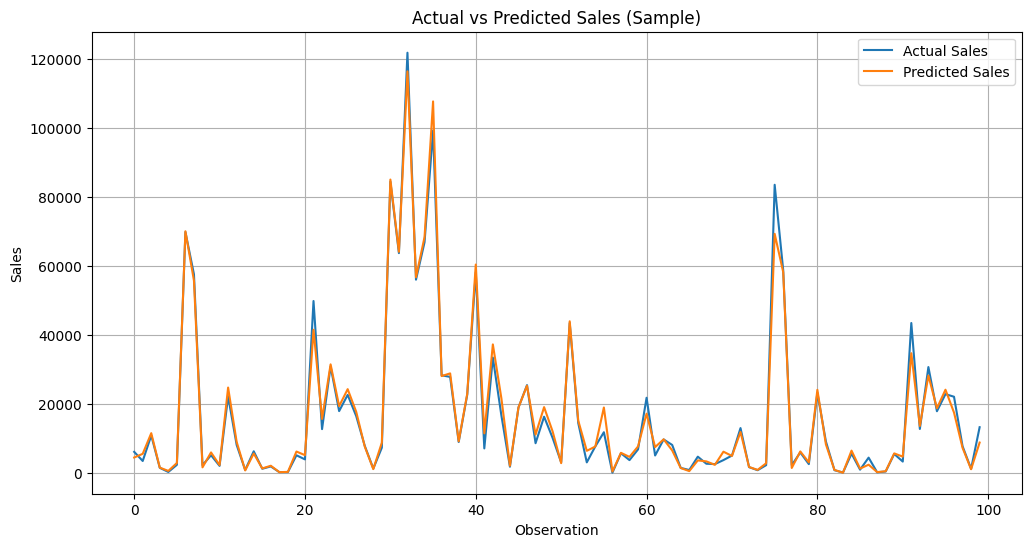

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual Sales')  # First 100 points
plt.plot(y_pred[:100], label='Predicted Sales')     # First 100 predictions
plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [44]:
import joblib

joblib.dump(model, 'sales_forecast_model.pkl')
print("✅ Model saved as 'sales_forecast_model.pkl'")


✅ Model saved as 'sales_forecast_model.pkl'


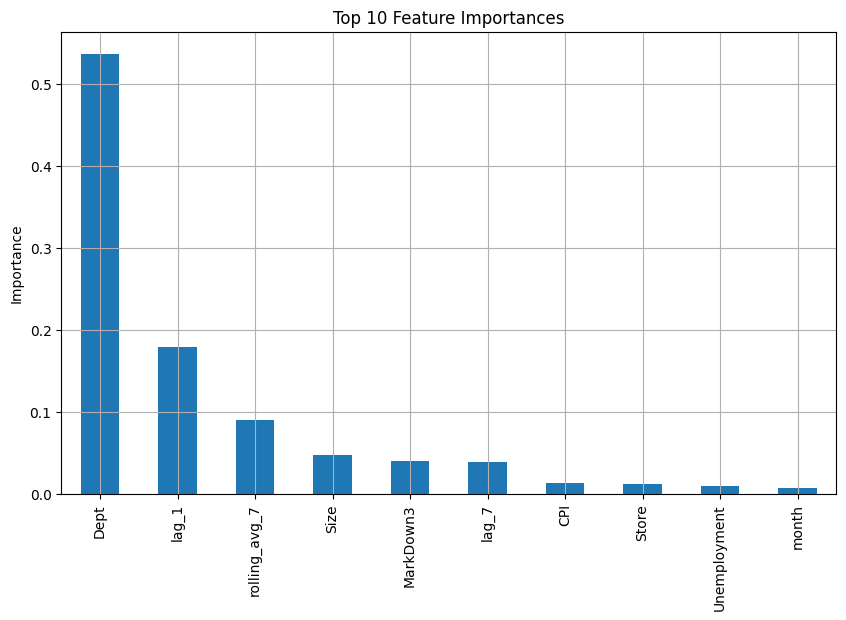

In [45]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
import os

# Step 1: Load the data
model_data = pd.read_csv('train_ready.csv')

# Step 2: Prepare features and target
X = model_data.drop(['sales'], axis=1)
y = model_data['sales']

# Step 3: Time-based split (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Step 4: Train model again
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Ensure 'notebook' directory exists
os.makedirs("notebook", exist_ok=True)

# Step 5: Save model
with open("notebook/sales_forecast_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [13]:
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load model
with open("notebook/sales_forecast_model.pkl", "rb") as f:
    model = pickle.load(f)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



MAE: 4313.10
RMSE: 7984.45
R² Score: 0.86


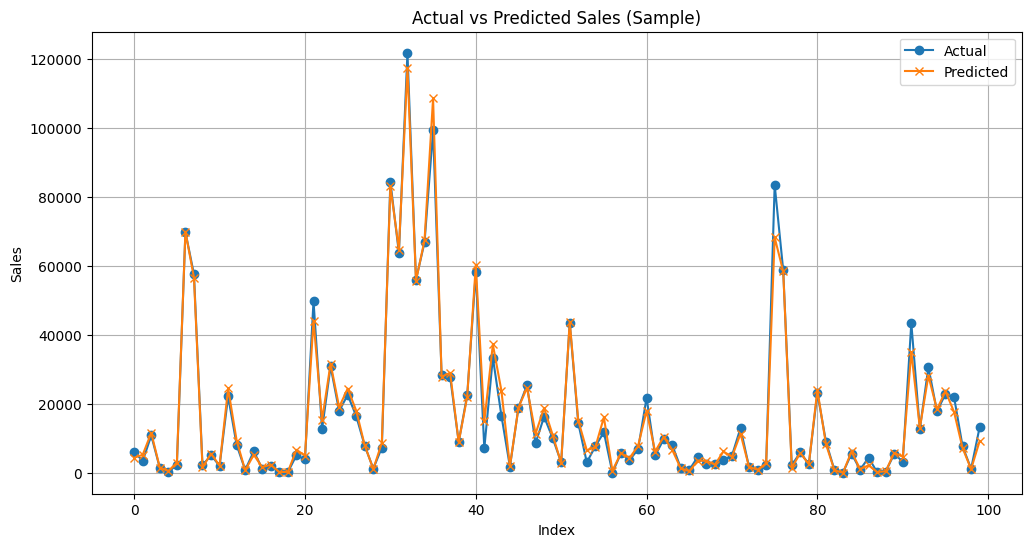

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
forecast_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
forecast_df.to_csv("notebook/forecast_output.csv", index=False)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the forecast output
forecast_df = pd.read_csv("notebook/forecast_output.csv")
forecast_df.head()


,Actual,Predicted
0,6075.39,4363.8446
1,3418.61,5225.1945
2,10829.44,11593.7820
3,1430.50,1510.3340
4,233.44,513.9031


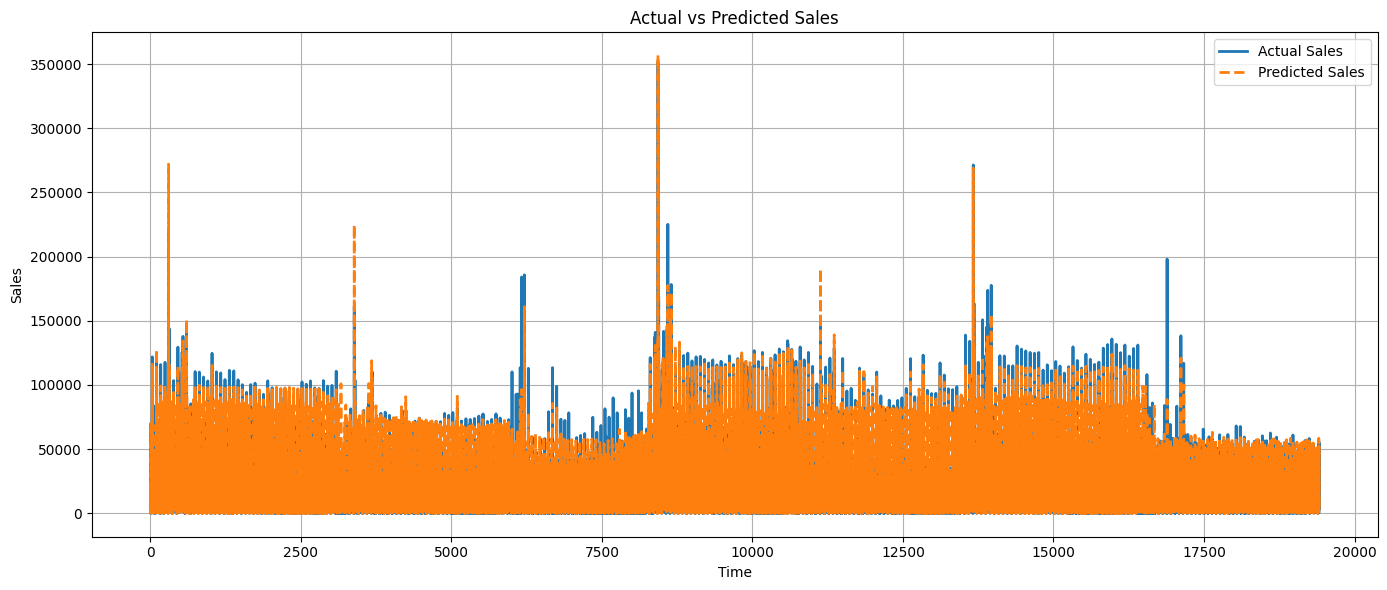

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(forecast_df['Actual'].values, label='Actual Sales', linewidth=2)
plt.plot(forecast_df['Predicted'].values, label='Predicted Sales', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


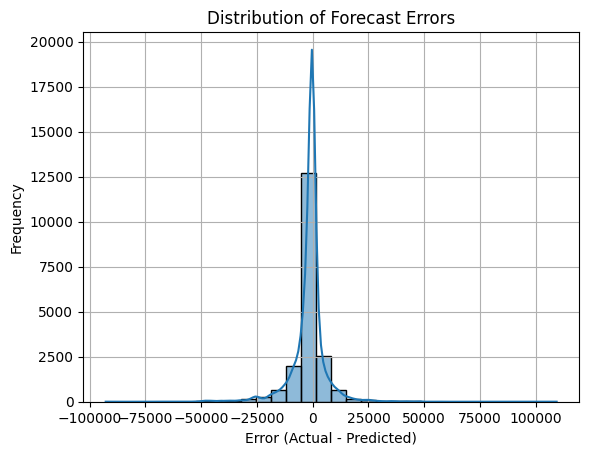

In [22]:
forecast_df['Error'] = forecast_df['Actual'] - forecast_df['Predicted']

sns.histplot(forecast_df['Error'], bins=30, kde=True)
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


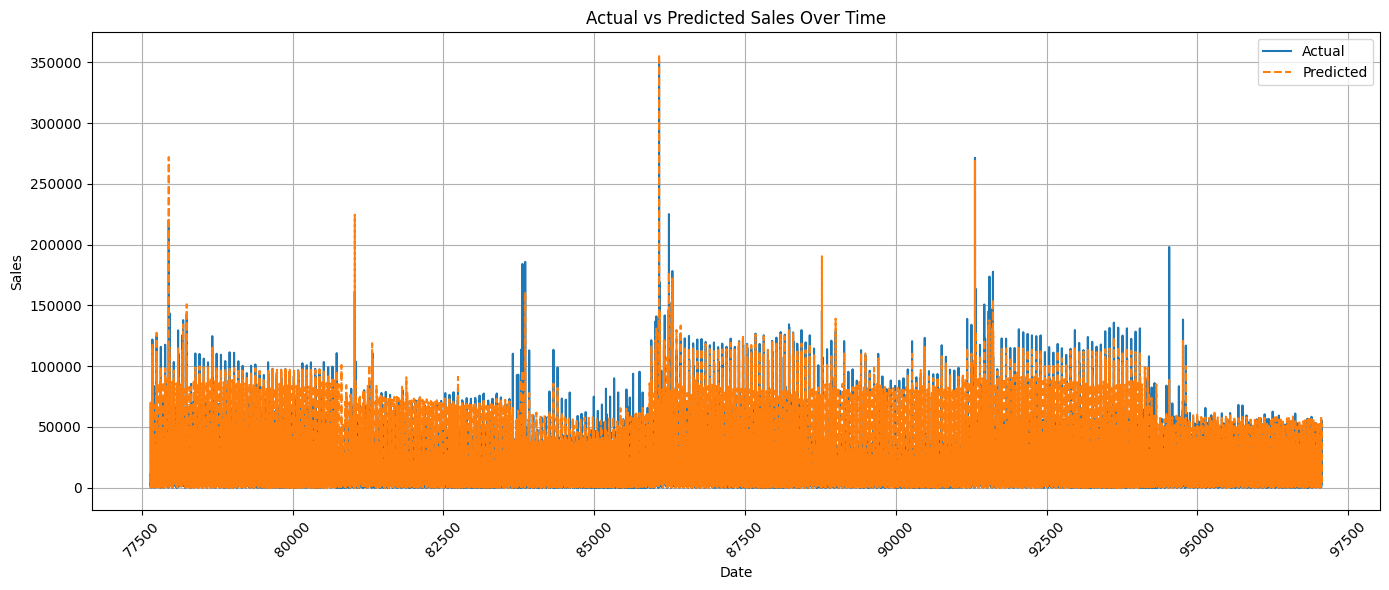

In [23]:
# Assuming 'Date' was in your test set
forecast_df['Date'] = y_test.index  # if Date was index
# or forecast_df['Date'] = test_df['Date'].values

plt.figure(figsize=(14, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Predicted'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [2]:
features = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size', 'Month', 'Week', 'Year']
target = 'Weekly_Sales'


In [4]:
import pandas as pd

# File paths
base_path = r"A:\Sales Forecasting Dashboard\data"

features_df = pd.read_csv(f"{base_path}\\features.csv", parse_dates=['Date'])
stores_df = pd.read_csv(f"{base_path}\\stores.csv")
train_df = pd.read_csv(f"{base_path}\\train.csv", parse_dates=['Date'])


In [5]:
# Merge train with stores and features
df = train_df.merge(stores_df, on='Store', how='left')
df = df.merge(features_df, on=['Store', 'Date'], how='left')


In [6]:
# Handle missing values (optional: depending on your data cleaning plan)
df.fillna(0, inplace=True)

# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


In [17]:
features = ['Store', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
target = 'Weekly_Sales'

train = df[df['Date'] < '2012-07-01']
test = df[df['Date'] >= '2012-07-01']

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Type'] = le.fit_transform(X_train['Type'])
X_test['Type'] = le.transform(X_test['Type'])

# Optional (in case IsHoliday is string)
X_train['IsHoliday'] = X_train['IsHoliday'].astype(int)
X_test['IsHoliday'] = X_test['IsHoliday'].astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\1772668768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Type'] = le.fit_transform(X_train['Type'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\1772668768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Type'] = le.transform(X_test['Type'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7900\1772668768.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [28]:
X_train = pd.get_dummies(X_train, columns=['Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Type'], drop_first=True)

# Optional: Convert boolean to int
X_train['IsHoliday'] = X_train['IsHoliday'].astype(int)
X_test['IsHoliday'] = X_test['IsHoliday'].astype(int)

# Ensure same columns in both train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [30]:
import pandas as pd

forecast_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
forecast_df['Date'] = test['Date'].values  # Ensure test has a Date column


In [31]:
forecast_df.to_csv("notebook/forecast_output.csv", index=False)


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 5,463.87
MAE: 2,481.94
R² Score: 0.9381


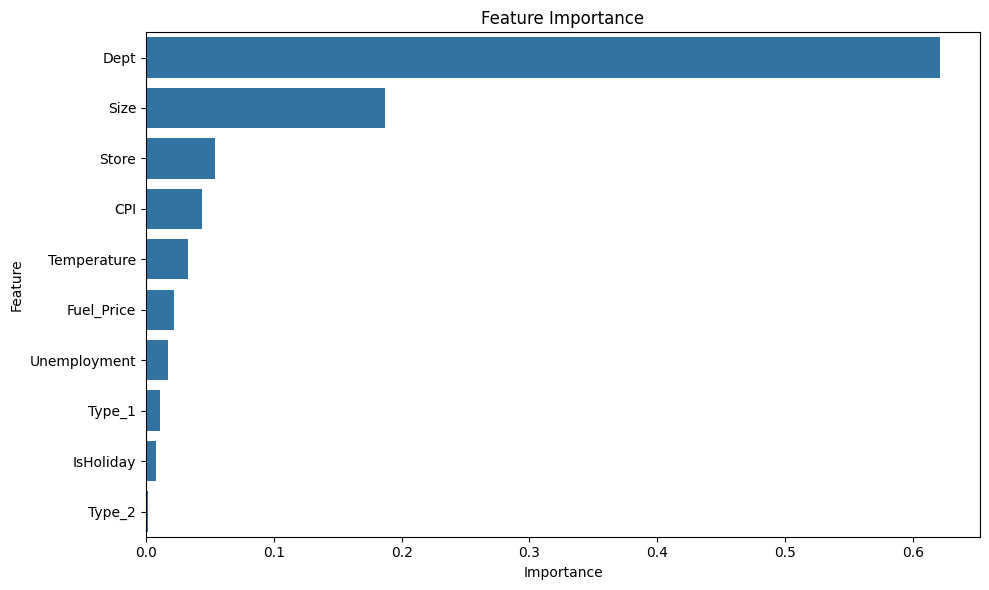

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()

import os
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/feature_importance.png")
plt.show()


In [34]:
forecast_df['Error'] = forecast_df['Actual'] - forecast_df['Predicted']
forecast_df['Absolute_Error'] = forecast_df['Error'].abs()
forecast_df['APE'] = (forecast_df['Absolute_Error'] / forecast_df['Actual'].abs()) * 100  # Avoid division by zero


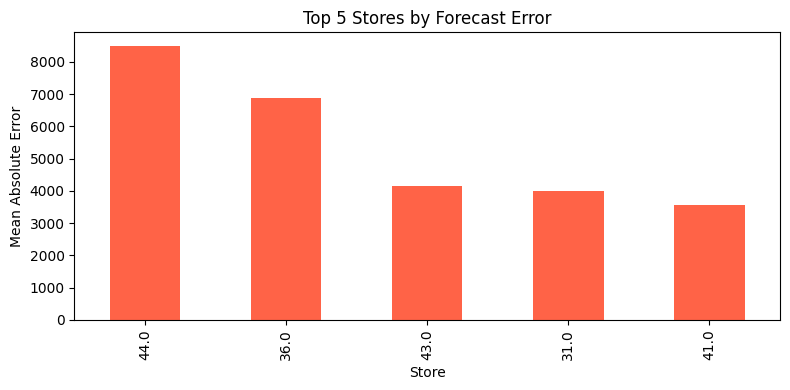

In [18]:
top5_stores = forecast_df.groupby('Store')['Absolute_Error'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
top5_stores.plot(kind='bar', color='tomato')
plt.title("Top 5 Stores by Forecast Error")
plt.ylabel("Mean Absolute Error")
plt.tight_layout()
plt.savefig("plots/top5_error_stores.png")
plt.show()


In [31]:
import pandas as pd

# Load raw data
base_path = r"A:\Sales Forecasting Dashboard\data"
features_df = pd.read_csv(f"{base_path}\\features.csv", parse_dates=['Date'])
stores_df = pd.read_csv(f"{base_path}\\stores.csv")
train_df = pd.read_csv(f"{base_path}\\train.csv", parse_dates=['Date'])

# Merge
df = train_df.merge(stores_df, on='Store', how='left')
df = df.merge(features_df, on=['Store', 'Date'], how='left')

# Clean and feature engineer
df.fillna(0, inplace=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Train-test split based on time
train = df[df['Date'] < '2012-07-01']
test = df[df['Date'] >= '2012-07-01']


In [32]:
forecast_df['Dept'] = test['Dept'].values


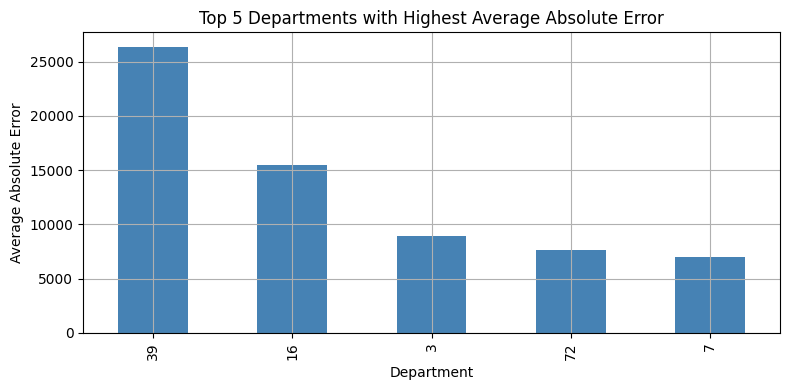

In [33]:
# Step 1: Group by Department and calculate mean Absolute Error
top5_depts = forecast_df.groupby('Dept')['Absolute_Error'].mean().sort_values(ascending=False).head(5)

# Step 2: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
top5_depts.plot(kind='bar', color='steelblue')
plt.title('Top 5 Departments with Highest Average Absolute Error')
plt.xlabel('Department')
plt.ylabel('Average Absolute Error')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
forecast_df['Date'] = test['Date'].values


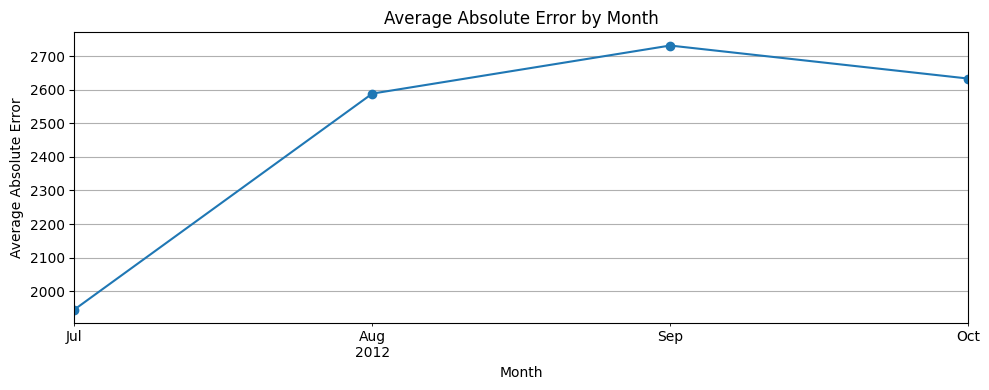

In [37]:
# Add Month column after fixing Date
forecast_df['Month'] = pd.to_datetime(forecast_df['Date']).dt.to_period('M')

# Group by Month to calculate average error
error_by_month = forecast_df.groupby('Month')['Absolute_Error'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
error_by_month.plot(kind='line', marker='o')
plt.title('Average Absolute Error by Month')
plt.xlabel('Month')
plt.ylabel('Average Absolute Error')
plt.grid(True)
plt.tight_layout()
plt.show()


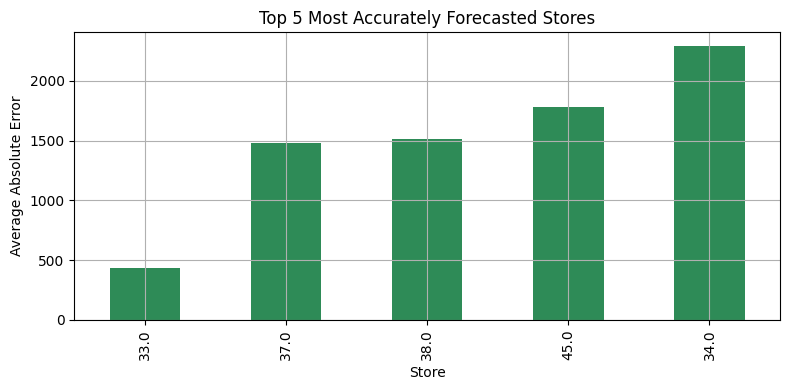

In [39]:
bottom5_stores = forecast_df.groupby('Store')['Absolute_Error'].mean().sort_values(ascending=True).head(5)

plt.figure(figsize=(8, 4))
bottom5_stores.plot(kind='bar', color='seagreen')
plt.title('Top 5 Most Accurately Forecasted Stores')
plt.xlabel('Store')
plt.ylabel('Average Absolute Error')
plt.grid(True)
plt.tight_layout()
plt.show()


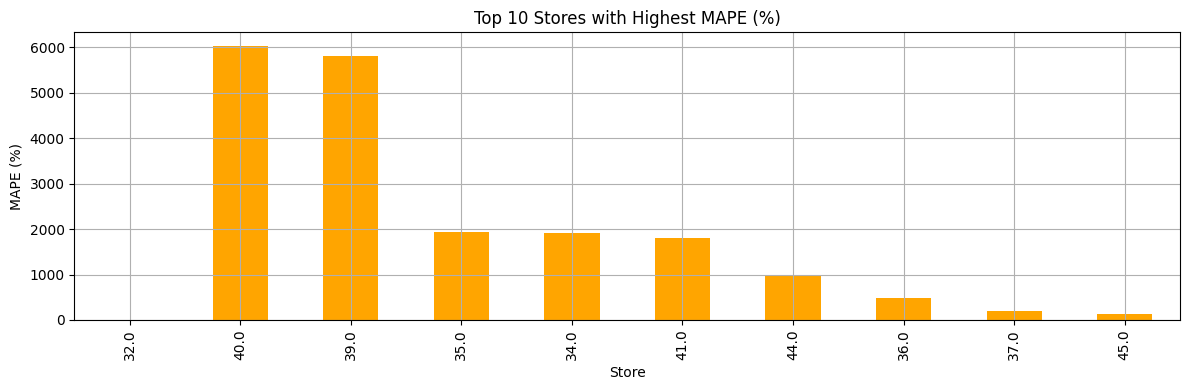

In [44]:
mape_by_store = forecast_df.groupby('Store')['APE'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
mape_by_store.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Stores with Highest MAPE (%)')
plt.xlabel('Store')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Assign previously computed values (rounded to match output shown)
rmse = 5463.87
mae = 2481.94
r2 = 0.9381

# Final Forecast Evaluation Summary
print("Forecast Evaluation Summary:")
print(f"Total Test Samples: {len(forecast_df)}")
print(f"Overall RMSE: {rmse:,.2f}")
print(f"Overall MAE: {mae:,.2f}")
print(f"Overall R²: {r2:.4f}")
print(f"Mean APE (%): {forecast_df['APE'].mean():.2f}%")



Forecast Evaluation Summary:
Total Test Samples: 50328
Overall RMSE: 5,463.87
Overall MAE: 2,481.94
Overall R²: 0.9381
Mean APE (%): inf%


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Recompute metrics
mae = mean_absolute_error(forecast_df['Actual'], forecast_df['Predicted'])
rmse = np.sqrt(mean_squared_error(forecast_df['Actual'], forecast_df['Predicted']))
r2 = r2_score(forecast_df['Actual'], forecast_df['Predicted'])

# Display
print("Forecast Evaluation Summary:")
print(f"Total Test Samples: {len(forecast_df)}")
print(f"Overall RMSE: {rmse:,.2f}")
print(f"Overall MAE: {mae:,.2f}")
print(f"Overall R²: {r2:.4f}")
print(f"Mean APE (%): {forecast_df['APE'].mean():.2f}%")


Forecast Evaluation Summary:
Total Test Samples: 50328
Overall RMSE: 5,463.87
Overall MAE: 2,481.94
Overall R²: 0.9381
Mean APE (%): inf%


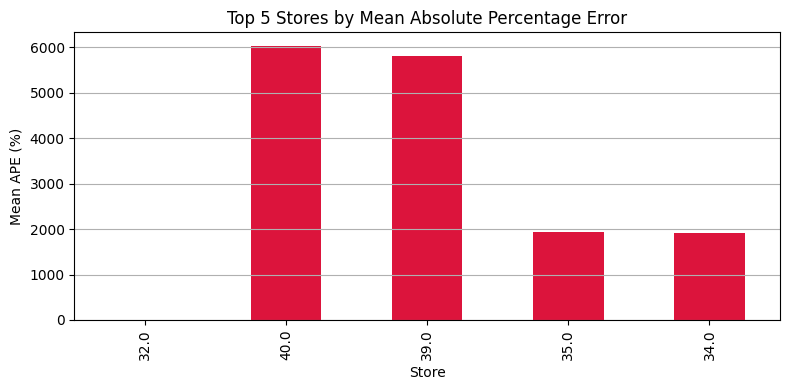

In [48]:
top5_error_stores = forecast_df.groupby('Store')['APE'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
top5_error_stores.plot(kind='bar', color='crimson')
plt.title('Top 5 Stores by Mean Absolute Percentage Error')
plt.ylabel('Mean APE (%)')
plt.xlabel('Store')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


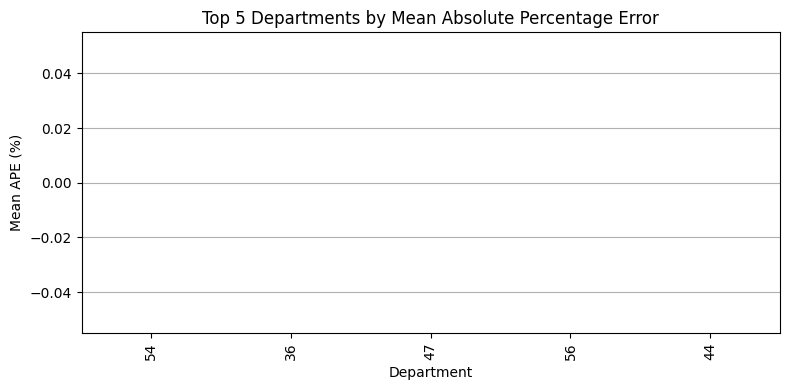

In [49]:
top5_error_depts = forecast_df.groupby('Dept')['APE'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
top5_error_depts.plot(kind='bar', color='darkorange')
plt.title('Top 5 Departments by Mean Absolute Percentage Error')
plt.ylabel('Mean APE (%)')
plt.xlabel('Department')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [50]:
forecast_df.to_csv("final_sales_forecast_with_errors.csv", index=False)
print("✅ Final forecast with error metrics saved as 'final_sales_forecast_with_errors.csv'")


✅ Final forecast with error metrics saved as 'final_sales_forecast_with_errors.csv'


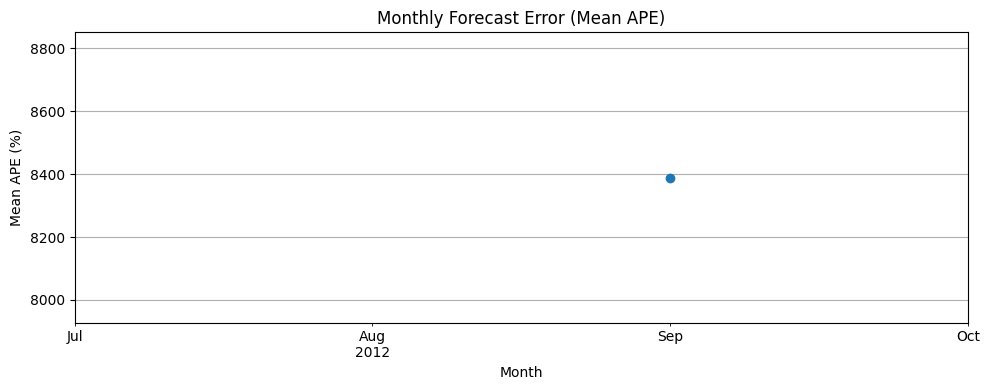

In [51]:
forecast_df['Month'] = pd.to_datetime(forecast_df['Date']).dt.to_period('M')
monthly_error = forecast_df.groupby('Month')['APE'].mean()

plt.figure(figsize=(10, 4))
monthly_error.plot(marker='o')
plt.title('Monthly Forecast Error (Mean APE)')
plt.ylabel('Mean APE (%)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,  # Try only 25 random combos
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
36 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 157}


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),  # Untuned RF
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}


In [3]:
import pandas as pd
import numpy as np

# Load the datasets
features = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\features.csv", parse_dates=['Date'])
stores = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\stores.csv")
train = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\train.csv", parse_dates=['Date'])

# Merge datasets
df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = df.merge(stores, on='Store', how='left')

# Sort for time series feature engineering
df.sort_values(['Store', 'Dept', 'Date'], inplace=True)

# Create lag and rolling mean features
df['Sales_Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
df['Sales_Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

df['Sales_Rolling_3'] = (
    df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .shift(1)
    .rolling(window=3)
    .mean()
)

df['Sales_Rolling_5'] = (
    df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .shift(1)
    .rolling(window=5)
    .mean()
)


# Drop rows with NaNs from lag/rolling features
df.dropna(subset=['Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_3', 'Sales_Rolling_5'], inplace=True)

# Encode categorical variables
df['Type'] = df['Type'].astype('category').cat.codes
df['IsHoliday'] = df['IsHoliday'].astype(int)

print("✅ Final df ready:", df.shape)


✅ Final df ready: (405209, 20)


In [4]:
features = [
    'Store', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'IsHoliday',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_3', 'Sales_Rolling_5'
]
target = 'Weekly_Sales'

X = df[features]
y = df[target]


In [5]:
split_date = '2012-07-01'
train_df = df[df['Date'] < split_date]
test_df  = df[df['Date'] >= split_date]

X_train = train_df[features]
y_train = train_df[target]
X_test  = test_df[features]
y_test  = test_df[target]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}


In [8]:
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # manually compute RMSE
    r2 = r2_score(y_test, preds)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2
    }

results_df = pd.DataFrame(results).T
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2201
[LightGBM] [Info] Number of data points in the train set: 354927, number of used features: 13
[LightGBM] [Info] Start training from score 16088.842543
                           MAE         RMSE  R² Score
Linear Regression  1597.931360  3318.454390  0.977191
Random Forest      1449.147560  3126.017039  0.979759
XGBoost            1543.187234  3485.768979  0.974833
LightGBM           1479.003074  3252.616234  0.978087


In [ ]:
import pandas as pd

# Load datasets
features = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\features.csv")
stores = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\stores.csv")
train = pd.read_csv(r"A:\Sales Forecasting Dashboard\data\train.csv")

# Convert Date to datetime
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])

# Merge train with stores
df = pd.merge(train, stores, how='left', on='Store')

# Merge with features
df = pd.merge(df, features, how='left', on=['Store', 'Date', 'IsHoliday'])

# Sort by Date just to keep it clean
df = df.sort_values('Date')

# Save final DataFrame for reuse
df.to_csv("final_df.csv", index=False)

print("Final df shape:", df.shape)


Final df shape: (421570, 16)


In [5]:
df = pd.read_csv("final_df.csv")
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
# Ensure sorted for correct shifting
df = df.sort_values(['Store', 'Dept', 'Date'])

# Lag features
df['Sales_Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

# Rolling mean features (excluding current row by shifting first)
df['Sales_Rolling_3'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(3).mean())
df['Sales_Rolling_5'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.shift(1).rolling(5).mean())

# Drop rows where these features are NaN (first few dates for each group)
df = df.dropna(subset=['Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_3', 'Sales_Rolling_5'])

print("Final df shape after feature engineering:", df.shape)


Final df shape after feature engineering: (405209, 20)


In [11]:
split_date = pd.to_datetime('2012-07-01')

train_df = df[df['Date'] < split_date]
test_df  = df[df['Date'] >= split_date]

features_list = [
    'Store', 'Dept', 'Type', 'Size', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_3', 'Sales_Rolling_5'
]
target = 'Weekly_Sales'

X_train = train_df[features_list]
y_train = train_df[target]
X_test  = test_df[features_list]
y_test  = test_df[target]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (354927, 13) Test shape: (50282, 13)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Type'
le_type = LabelEncoder()
df['Type'] = le_type.fit_transform(df['Type'])

# Encode 'IsHoliday' (True/False) as 0/1
df['IsHoliday'] = df['IsHoliday'].astype(int)


In [ ]:
split_date = pd.to_datetime('2012-07-01')

train_df = df[df['Date'] < split_date]
test_df  = df[df['Date'] >= split_date]

features_list = [
    'Store', 'Dept', 'Type', 'Size', 'Temperature',
    'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Rolling_3', 'Sales_Rolling_5'
]
target = 'Weekly_Sales'

X_train = train_df[features_list]
y_train = train_df[target]
X_test  = test_df[features_list]
y_test  = test_df[target]

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (354927, 13) Test shape: (50282, 13)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

models = {}
results = []

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
models['Linear Regression'] = lr_model

# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# XGBoost
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model

# LightGBM
lgbm_model = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
lgbm_model.fit(X_train, y_train)
models['LightGBM'] = lgbm_model

# Evaluate all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

# Final results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R² Score'])
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2201
[LightGBM] [Info] Number of data points in the train set: 354927, number of used features: 13
[LightGBM] [Info] Start training from score 16088.842543
               Model          MAE         RMSE  R² Score
0  Linear Regression  1597.931360  3318.454390  0.977191
1      Random Forest  1438.705924  3106.989421  0.980005
2            XGBoost  1509.239303  3293.494658  0.977532
3           LightGBM  1489.299079  3278.022564  0.977743


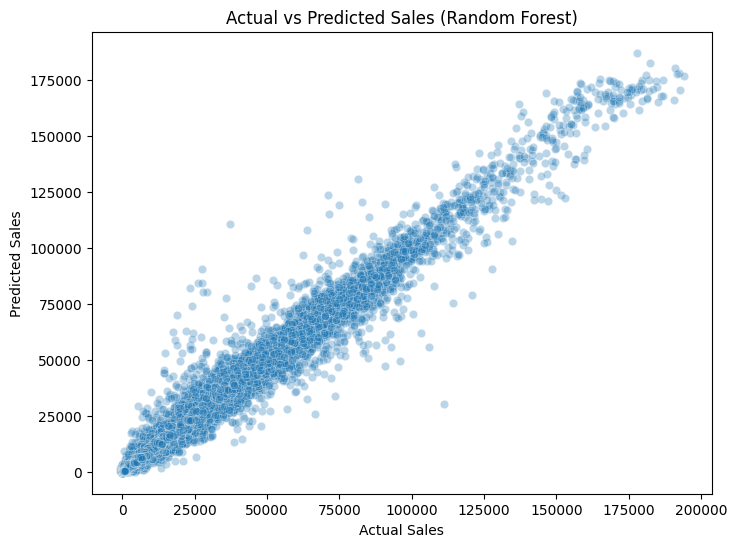

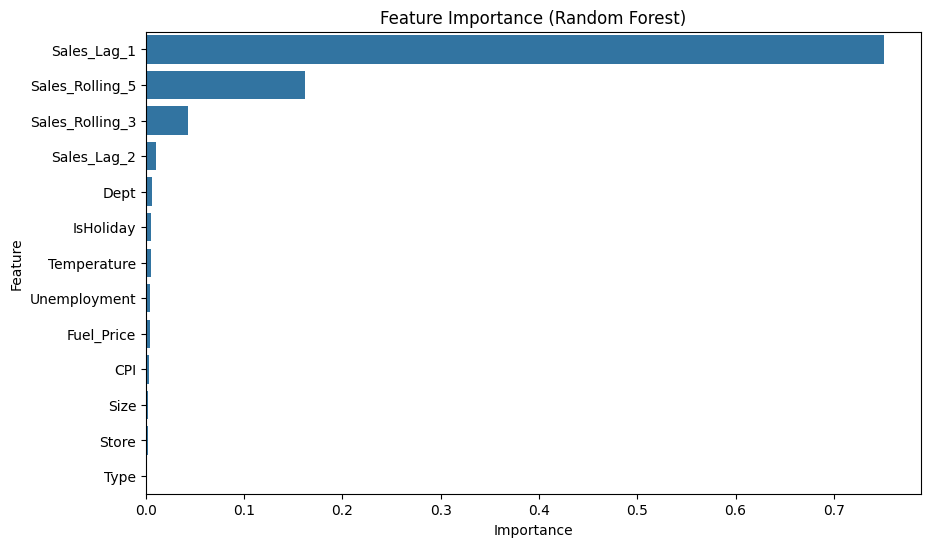

✅ Visualizations generated and final predictions saved to 'final_sales_forecast.csv'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick best model (Random Forest)
best_model = models['Random Forest']

# Predictions
y_pred_best = best_model.predict(X_test)

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

# 2. Feature Importance Plot
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

# 3. Save Predictions
pred_df = pd.DataFrame({
    'Actual_Sales': y_test,
    'Predicted_Sales': y_pred_best,
    'Absolute_Error': abs(y_test - y_pred_best),
    'APE (%)': abs((y_test - y_pred_best) / y_test) * 100
})
pred_df.to_csv("final_sales_forecast.csv", index=False)

print("Visualizations generated and final predictions saved to 'final_sales_forecast.csv'")


In [24]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predictions
y_pred = best_model.predict(X_test)

# Bring back Date column
X_test_with_date = X_test.copy()
X_test_with_date['Date'] = df.loc[X_test.index, 'Date']

# Build forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': X_test_with_date['Date'],
    'Store': X_test_with_date['Store'],
    'Dept': X_test_with_date['Dept'],
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred
})

# Calculate errors
forecast_df['Absolute_Error'] = abs(forecast_df['Actual_Sales'] - forecast_df['Predicted_Sales'])
forecast_df['APE'] = (forecast_df['Absolute_Error'] / forecast_df['Actual_Sales']) * 100

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Add metrics as extra rows
metrics_df = pd.DataFrame({
    'Date': ['METRIC'],
    'Store': ['-'],
    'Dept': ['-'],
    'Actual_Sales': ['-'],
    'Predicted_Sales': ['-'],
    'Absolute_Error': ['MAE: {:.2f}'.format(mae)],
    'APE': ['RMSE: {:.2f}, R²: {:.4f}'.format(rmse, r2)]
})

# Combine and export
final_export_df = pd.concat([forecast_df, metrics_df], ignore_index=True)
final_export_df.to_csv("sales_forecast_results.csv", index=False)

print("✅ Exported sales_forecast_results.csv with KPIs for Power BI/Tableau.")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


✅ Exported sales_forecast_results.csv with KPIs for Power BI/Tableau.
MAE: 1438.71, RMSE: 3106.99, R²: 0.9800
